<a href="https://colab.research.google.com/github/Prashant528/MelanomaDetector/blob/master/latest(128%7C81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
import itertools
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
img_size = 600,450
train_batch_size = 5
test_batch_size = 5
train_step = 228
test_step = 76

In [0]:
train_datagen = ImageDataGenerator(
                               zoom_range=[0.75, 1.25],
                               brightness_range=[0.5, 1.5])
test_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

In [0]:
print('--------------LOADING TRAINING SET----------------')
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/rgb_data/new_train',
                                                target_size = (img_size),
                                                batch_size = train_batch_size,
                                                color_mode='rgb',
                                                shuffle = True,
                                                class_mode = 'binary')
print('------------LOADING TEST SET---------------------')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/rgb_data/new_test',
                                            target_size = (img_size),
                                            batch_size = test_batch_size,
                                            color_mode = 'rgb',
                                            shuffle = True,
                                            class_mode = 'binary')
print('------------LOADING CROSS-VALIDATION SET---------------------')
valid_set = validation_datagen.flow_from_directory('/content/drive/My Drive/rgb_data/new_valid',
                                            target_size = (img_size),
                                            batch_size = 1,
                                            color_mode = 'rgb',
                                            shuffle = False,
                                            class_mode = 'binary')

# confirm the iterator works
batchX, batchy = test_set.next()


In [6]:
model = Sequential()
model.add(Convolution2D(filters =32,
                        kernel_size =(3,3),
                        input_shape =(600,450,3),
                        activation='relu'))
model.add(MaxPooling2D(pool_size = (4,4)))

model.add(Convolution2D(32,(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(16,(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(16,(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(16,(3,3),activation='sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation = 'sigmoid'))
model.add(Dense(units=256, activation = 'sigmoid'))
model.add(Dense(units=256, activation = 'sigmoid'))
model.add(Dense(units=128, activation = 'sigmoid'))

model.add(Dense(units=1, activation = 'sigmoid'))


# sgd = tensorflow.keras.optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.9, nesterov=True)
adam = tensorflow.keras.optimizers.Adam(lr=0.0001)
model.compile(loss = 'binary_crossentropy',
              optimizer = adam,
              metrics =['accuracy'])
model.summary()
plot_model(model, to_file='/content/drive/My Drive/ham_data/outfiles/last(128).png', show_shapes=True)
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tensorflow.keras.callbacks.EarlyStopping(patience=5, monitor='loss')]

W0817 09:06:33.950600 139992922462080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 09:06:34.213067 139992922462080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 448, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 53, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 26, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 24, 16)        2

Epoch 1/500
228/228 [==============================] - 1011s 4s/step - loss: 0.6967 - acc: 0.5092 - val_loss: 0.6880 - val_acc: 0.5553
Epoch 2/500
228/228 [==============================] - 120s 525ms/step - loss: 0.6989 - acc: 0.4899 - val_loss: 0.6980 - val_acc: 0.4447
Epoch 3/500
228/228 [==============================] - 81s 356ms/step - loss: 0.6943 - acc: 0.5162 - val_loss: 0.6958 - val_acc: 0.4447
Epoch 4/500
228/228 [==============================] - 81s 356ms/step - loss: 0.6938 - acc: 0.5088 - val_loss: 0.7173 - val_acc: 0.4447
Epoch 5/500
228/228 [==============================] - 81s 354ms/step - loss: 0.6961 - acc: 0.5202 - val_loss: 0.7004 - val_acc: 0.4447
Epoch 6/500
228/228 [==============================] - 80s 352ms/step - loss: 0.6956 - acc: 0.5250 - val_loss: 0.6873 - val_acc: 0.5553
Epoch 7/500
228/228 [==============================] - 80s 353ms/step - loss: 0.6974 - acc: 0.4912 - val_loss: 0.6958 - val_acc: 0.4447
Epoch 8/500
228/228 [===========================

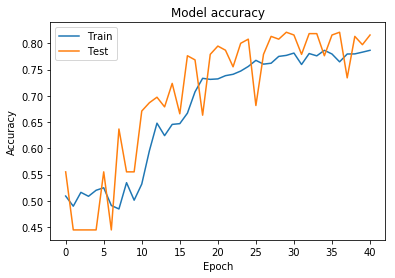

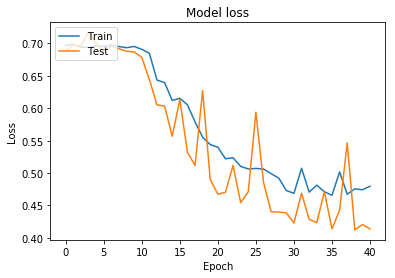

In [7]:
history=model.fit_generator(
        training_set,
        steps_per_epoch = train_step,
        epochs = 500,
        callbacks = callbacks,
        validation_data = test_set,
        validation_steps = test_step,
        verbose=1)

model.save('/content/drive/My Drive/ham_data/outfiles/last(128).h5')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [0]:

predictions = np.round(model.predict_generator(valid_set, steps=431))
print(predictions)

In [0]:
print(valid_set.classes)

In [0]:

pred = []
for i in range(381):
  pred.append(int(predictions[i,0]))

In [0]:
predd = np.array(pred)
print(predd)

In [0]:
# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(valid_set.classes, predd)

cm_plot_labels = ['mel', 'non']

plot_confusion_matrix(cm, cm_plot_labels)

In [0]:
#Confution Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(valid_set.classes, predd))
print('Classification Report')
target_names = ['melanoma', 'non-melanoma']
print(classification_report(valid_set.classes, predd, target_names=target_names))